# Cria dataframes de cada atributo com resumo
De forma resumida

In [32]:
# Desativar avisos de expiração
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset 
dados = sns.load_dataset('titanic')

# Função para criar dataframes individuais para cada coluna não numérica
def criar_dataframes_por_coluna_nao_numerica(df):
    dataframes_criados = []  # Lista para armazenar os nomes dos dataframes criados
    # Iterar sobre as colunas do dataframe
    for coluna in df.columns:
        if df[coluna].dtype == 'object':  # Verificar se o tipo de dado da coluna é não numérico
            # Nomear o dataframe com o prefixo "df_" e o nome da coluna
            nome_dataframe = f"df_{coluna}"
            
            # Salvar o dataframe em uma variável com o mesmo nome da coluna, prefixado com "df_"
            globals()[nome_dataframe] = df.groupby(coluna).size().reset_index(name='count')
            
            # Adicionar o nome do dataframe criado à lista de dataframes criados
            dataframes_criados.append(nome_dataframe)
    
    return dataframes_criados

# Criar dataframes individuais para cada coluna não numérica
dataframes = criar_dataframes_por_coluna_nao_numerica(dados)

# Exibir os nomes dos dataframes criados
print("Dataframes criados:")
for dataframe in dataframes:
    print(dataframe)

Dataframes criados:
df_sex
df_embarked
df_who
df_embark_town
df_alive


In [34]:
df_sex

,sex,count
0,female,314
1,male,577


In [35]:
df_embarked

,embarked,count
0,C,168
1,Q,77
2,S,644


# Cria dataframes dos atributos e suas aberturas
Esse é preciso ter cuidado, se uma coluna tiver muitos aberturas, serão criados muitos dataframes

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset 
dados = sns.load_dataset('titanic')

# Função para criar dataframes individuais para cada coluna não numérica
def criar_dataframes_por_coluna_nao_numerica(df):
    dataframes_criados = []  # Lista para armazenar os nomes dos dataframes criados
    # Iterar sobre as colunas do dataframe
    for coluna in df.columns:
        if df[coluna].dtype == 'object':  # Verificar se o tipo de dado da coluna é não numérico
            # Agrupar o dataframe principal por esta coluna não numérica
            grupos = df.groupby(coluna)
            
            # Iterar sobre cada grupo
            for nome_grupo, grupo in grupos:
                # Nomear o dataframe com o prefixo "df_" e o nome do grupo
                nome_dataframe = f"df_{coluna}_{nome_grupo}"
                
                # Salvar o dataframe em uma variável com o mesmo nome do grupo, prefixado com "df_"
                globals()[nome_dataframe] = grupo.copy()
                
                # Adicionar o nome do dataframe criado à lista de dataframes criados
                dataframes_criados.append(nome_dataframe)
    
    return dataframes_criados

# Criar dataframes individuais para cada coluna não numérica
dataframes = criar_dataframes_por_coluna_nao_numerica(dados)

# Exibir os nomes dos dataframes criados
print("Dataframes criados:")
for dataframe in dataframes:
    print(dataframe)

Dataframes criados:
df_sex_female
df_sex_male
df_embarked_C
df_embarked_Q
df_embarked_S
df_who_child
df_who_man
df_who_woman
df_embark_town_Cherbourg
df_embark_town_Queenstown
df_embark_town_Southampton
df_alive_no
df_alive_yes


In [37]:
df_sex_male.count()

survived       577
pclass         577
sex            577
age            453
sibsp          577
parch          577
fare           577
embarked       577
class          577
who            577
adult_male     577
deck           106
embark_town    577
alive          577
alone          577
dtype: int64

In [38]:
df_sex_female.count()

survived       314
pclass         314
sex            314
age            261
sibsp          314
parch          314
fare           314
embarked       312
class          314
who            314
adult_male     314
deck            97
embark_town    312
alive          314
alone          314
dtype: int64

In [39]:
df_sex.head(2)

,sex,count
0,female,314
1,male,577


In [40]:
df_alive.head(3)

,alive,count
0,no,549
1,yes,342


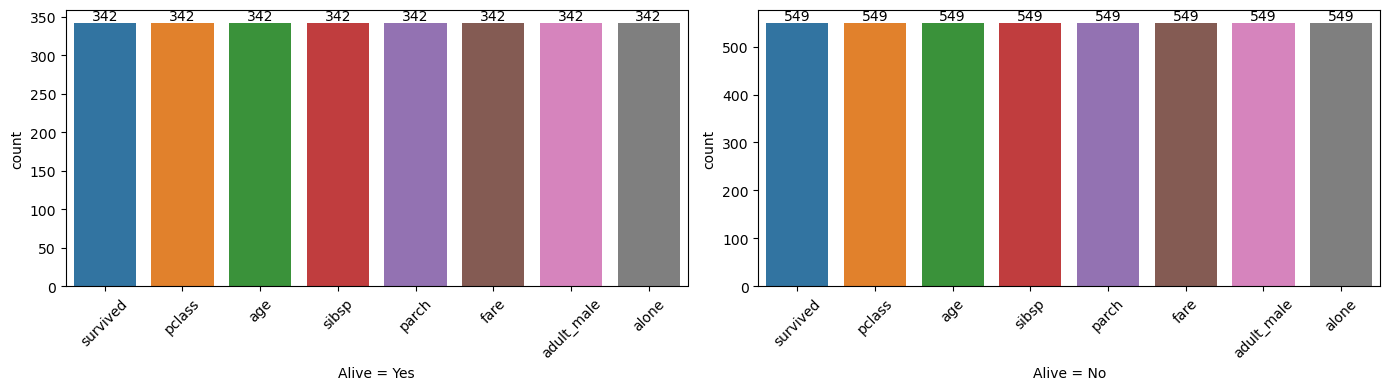

In [96]:
f, g = plt.subplot_mosaic([[1,2]], figsize=(14, 4))

sns.countplot(df_alive_yes,ax=g[1])
g[1].bar_label(g[1].containers[0], fontsize=10)
g[1].set_xlabel('Alive = Yes')


sns.countplot(df_alive_no,ax=g[2])
g[2].bar_label(g[2].containers[0], fontsize=10)
g[2].set_xlabel('Alive = No')

# Rotacionar os rótulos do eixo x em ambos os subplots
for ax in g.values():
    ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

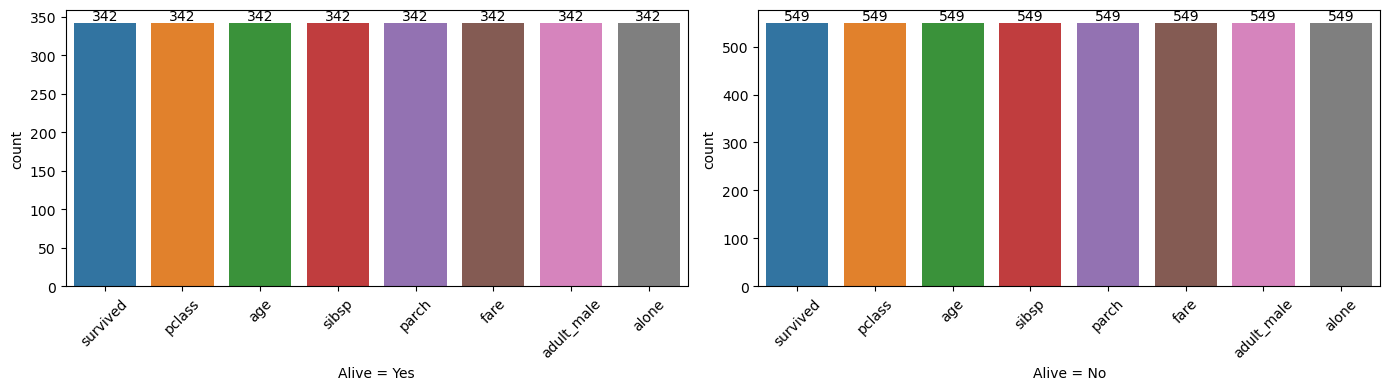

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar a figura e os subplots com subplot_mosaic
f, g = plt.subplot_mosaic([[1,2]], figsize=(14, 4))

# Plotar o countplot para 'alive = yes'
sns.countplot(df_alive_yes, ax=g[1])
g[1].bar_label(g[1].containers[0], fontsize=10)
g[1].set_xlabel('Alive = Yes')

# Plotar o countplot para 'alive = no'
sns.countplot(df_alive_no, ax=g[2])
g[2].bar_label(g[2].containers[0], fontsize=10)
g[2].set_xlabel('Alive = No')

# Rotacionar os rótulos do eixo x apenas no primeiro subplot
g[1].tick_params(axis='x', labelrotation=45)
g[2].tick_params(axis='x', labelrotation=45)

# Ajustar o layout e exibir o gráfico
plt.tight_layout()
plt.show()
